## **Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis**


#### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

#### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

#### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


### **Importing Necessary Libraries**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

print("Environment is working perfectly!")


Environment is working perfectly!


## Loading Dataset

In [47]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Stat_hypothesis_project\\yellow_tripdata_2020-01.csv', low_memory=False)


In [48]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [49]:
df.shape

(6405008, 18)

In [50]:
# Checking original data types

df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [51]:
#Changing the datatype (to datetime) because time value was in float

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])      
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [52]:
# Checking the data type as they have been changed or not

df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [53]:
# Extracted extra column ('duration') from data by analyzing dataset

df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']     
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [54]:
#the duration was in day and minut so converted into minits only 

df['duration'] = df['duration'].dt.total_seconds()/60  
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000



##### 
There are so many columns in the dataset, but as per our problem statement, we only required some fields from our original data. Rest columns are nothing but the unwanted columns for the study. So we will simply remove those columns.

As the problem statement is revolving around the payment type, fare amount, and other factor that are influencing the fare amount, we wll filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip
#####


In [55]:
#extracted only those columns which are required to study further depends on business question

df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']] 
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [56]:
#Checking if there is null values present in extracted data

df.isnull().sum()     

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [57]:
#Converted that null values into % so that we can drop or convert depending on how much % of data is missing

df.isnull().sum()/df.shape[0]*100   

passenger_count    1.021716
payment_type       1.021716
fare_amount        0.000000
trip_distance      0.000000
duration           0.000000
dtype: float64

In [58]:
#in here we have dropped the data becouse it is only 1% data missing so it is neglagible 

df.dropna(inplace=True)       

In [59]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [60]:
# these 2 variables cannot be in float value so changing dtype here into integer

df['passenger_count'] = df['passenger_count'].astype('int64')    
df['payment_type'] = df['payment_type'].astype('int64')

In [61]:
df 

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [62]:
#checking duplicate here

df[df.duplicated()]         

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [63]:
 #droping those duplicate

df.drop_duplicates(inplace= True)  

In [64]:
# After removing null values and duplicated rows this is how much data is remain

df.shape

(3007861, 5)

In [65]:
# there are 10 distinct values are present in passenger count and the value_count is in the percentage where 0.58 which means 58% 
# (normalize = True) this change the count in %

df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [66]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

#####
We will focus solely on payment types 'card' and 'cash', denoted by 1 and 2 in the dataset. To ensure our analysis centers on these payment methods, we'll filter the data accordingly, excluding all other types.

Moreover, examining the distribution of passenger counts reveals that trips with more than 5 passengers are rare. Additionally, trips with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount. Therefore, we will filter the passenger count to include only values ranging from 1 to 5.
#####

In [67]:
# We only want 1 & 2 payment type whch is'Card' & 'Cash' thats why we are removig other categories 
# The passenger count cannot be zero and more than 6 passenger % count is not contributing into our result much, thats why we are removig

df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)& (df['passenger_count']<6)]

In [68]:
df.shape

(2780283, 5)

In [69]:
# We need categoric value thats why we are replacing 1 & 2 with 'Cash' & 'Card'

df['payment_type'].replace([1,2],['card','cash'],inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


In [70]:
# After doing cleaning we are analyzing the data into descriptive statistical method

df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


#####
Upon reviewing the provided statistics, it's evident that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.
#####

In [71]:
# We have saw in descriptive analysi that there is min value going to negative, in here we are removing those negative values

df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [72]:
# Checking if the negative values are removed or not

df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

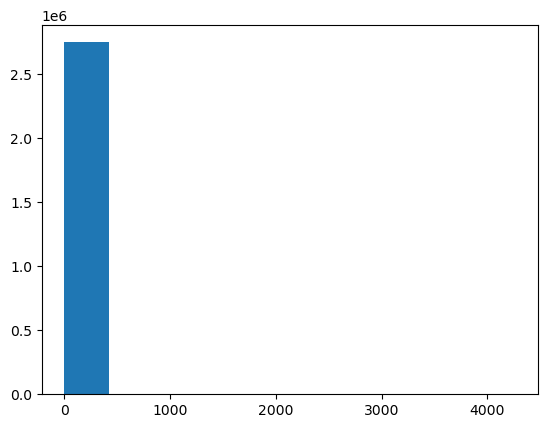

In [73]:
# Checking if there are any outliers present in fare_amount column using visualization (We can do this with all the columns)

plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x263827fcd50>,
 'caps': [<matplotlib.lines.Line2D at 0x263827fe0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x263827fc590>],
 'medians': [<matplotlib.lines.Line2D at 0x263827ff3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x263827ffd90>],
 'means': []}

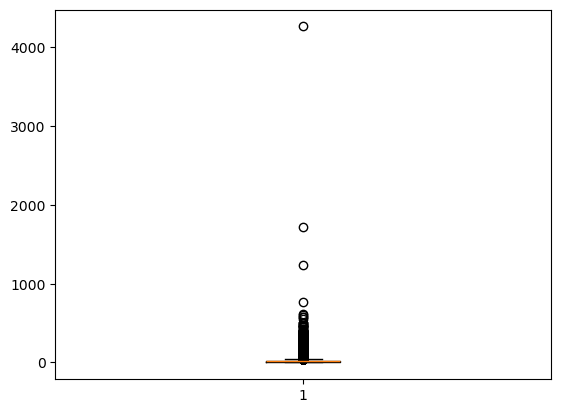

In [74]:
# This is another method to check if there is any outliers present in column

plt.boxplot(df['fare_amount'])

In [75]:
# There are multiple outliers present in data now here we are removing those outliers using Quartile method by setting upper limit and lowr limit

for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [76]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


#####
We're interested in exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.
#####

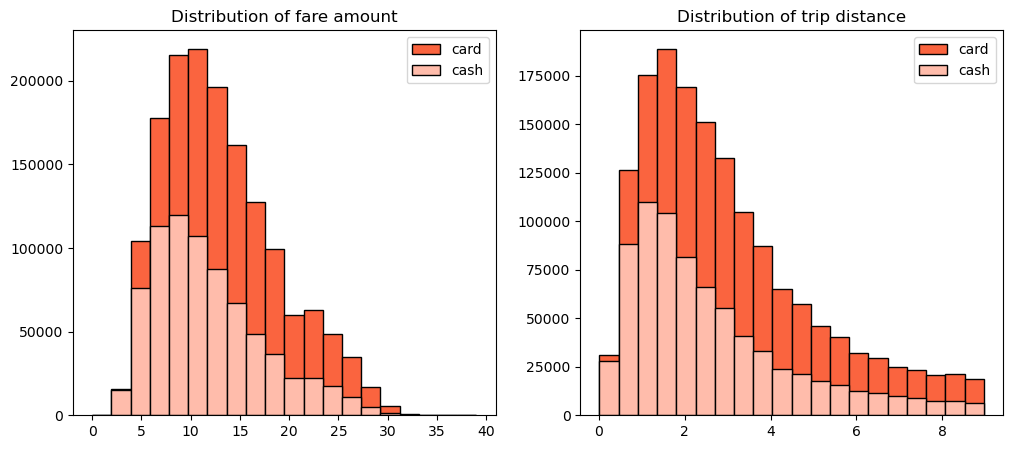

In [77]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'], histtype= 'barstacked', bins =20, edgecolor = 'k', color = '#FA643F', label ='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'], histtype= 'barstacked', bins =20, edgecolor = 'k', color = '#FFBCAB', label = 'cash')
plt.legend()


plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='card']['trip_distance'], histtype= 'barstacked', bins =20, edgecolor = 'k', color = '#FA643F', label ='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'], histtype= 'barstacked', bins =20, edgecolor = 'k', color = '#FFBCAB', label = 'cash')
plt.legend()
plt.show()

In [78]:
# We are comparing both with their mean and std daviation for that we are grouping and aggregating mean and std here

df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

#####
Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.
#####

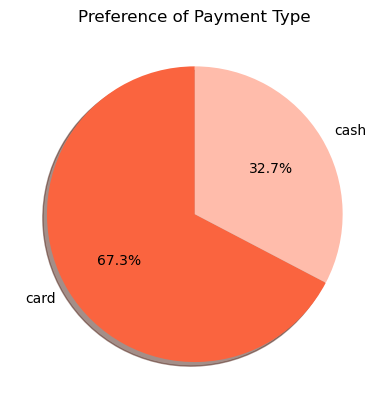

In [79]:
# Checkinh the percentage of distribution of data by category in pie chart visualization

plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

#####
Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.
#####

In [80]:
# We are analysing further about the choosing of payment type in terms of passenger count by grouping the payment type

df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

#####
To facilitate the examination, we have a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

The steps to create this stacked bar plot is from 36 to 40.
#####

In [81]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [82]:
passenger_count['percentage'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [83]:
passenger_count

,payment_type,passenger_count,count,percentage
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [84]:
passenger_count_summary = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
passenger_count_summary['payment_type'] = ['Card','Cash']
passenger_count_summary.iloc[0,1:] = passenger_count.iloc[0:5,-1]
passenger_count_summary.iloc[1,1:] = passenger_count.iloc[5:,-1]
passenger_count_summary

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


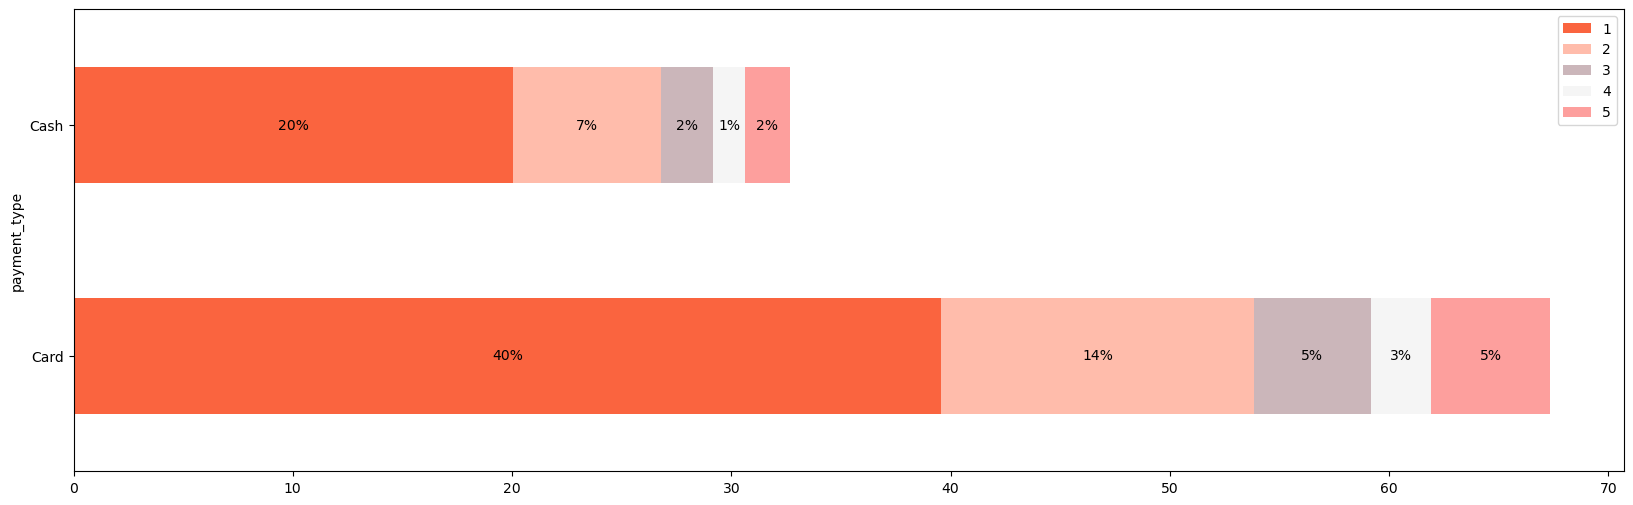

In [85]:
fig, ax = plt.subplots(figsize=(20,6))

# Plot stacked horizontal bar chart
passenger_count_summary.plot(x= 'payment_type', kind = 'barh', stacked = True, ax= ax, 
        color = ['#FA643F', '#FFBCAB', '#CBB6BA', '#F5F5F5', '#FD9F9D'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


### Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. 
If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.
#####

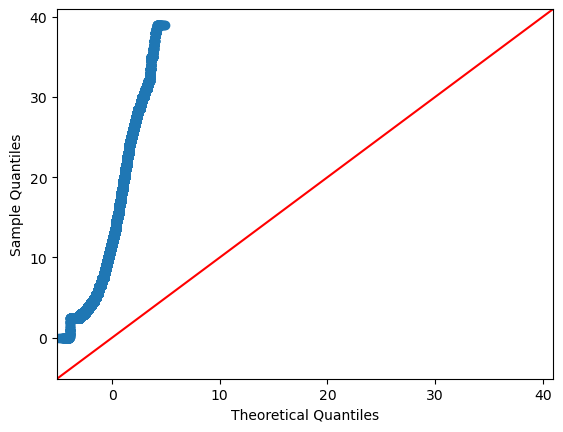

In [86]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

#####
The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

##### **Null hypothesis :** There is no difference in average fare between customers who use credit cards and customers who use cash.
##### **Alternate hypothesis :** There is difference in average fare between customers who use credit cards and customers who use cash.
#####

In [87]:
# sample 1
card_sample = df[df['payment_type']=='card']['fare_amount']

# sample 2
cash_sample = df[df['payment_type']=='cash']['fare_amount']

# Performing T test on both the different sample
t_stats, p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var = False) 
print('T statistics', t_stats, 'p-value', p_value)

# Comparing p value with the signficance of 5% or 0.05
if p_value < 0.05:
    print ('\nReject the null hypothesis')
else:
    print ('\nAccept the null hypothesis')


T statistics 169.2111527245052 p-value 0.0

Reject the null hypothesis


**Why Reject the null hypothesis**

Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.